# Примеры использования

In [229]:
load("../src/dps.sage")

**Протестировано на версии Sage 9.2**

In [230]:
import warnings
warnings.filterwarnings('ignore')

Необходимо задать схему в виде правой части дифференциального уравнения 
$$
\frac{dx}{dt} = F(\hat{x}, x, dt)
$$
В качестве исходной функции нужно задать [формальную функцию](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/function_factory.html). Обратите внимание, что:

In [231]:
var('x')
function('f') == function('f')(x)

False

## Коэффициенты

### Неявная схема

In [232]:
var('xx,x,t')
a_param = var(['a'] +['a' + str(i) for i in range(100)])
f = function('f', nargs = 1)
F = a0*f(xx) + a1*f(x)

In [233]:
s = Scheme([x,t],[f,_],a_param, F, order = 2, n_val = xx)
s.latex()

\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)


$$\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)$$

In [234]:
s.parametric_eqs(right = x^2 + 1)

[x == x,
 x^2 + 1 == (a0 + a1)*x^2 + a0 + a1,
 x^3 + x == 2*(a0^2 + a0*a1)*x^3 + 2*(a0^2 + a0*a1)*x]

$$\begin{cases}
 a_{0} - \frac{1}{2},\\a_{1} - \frac{1}{2},\\ 
\end{cases}
$$

Для рассчета коэффициентов выберем функцию $x^2 + 1$

In [235]:
s.coefficients(right = x^2 + 1)

[a0 - 1/2, a1 - 1/2]

### Явная схема Рунге-Кутты 4-го порядка

In [236]:
def rk4():
    k1 = f(x)
    k2 = f(x + k1*dt*a0)
    k3 = f(x + k2*dt*a1)
    k4 = f(x + k3*dt*a2)
    return a3*k1 + a4*k2 + a5*k3 + a6*k4

In [237]:
s = Scheme([x,t], [f,_], a_param, rk4(), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == (a3 + a4 + a5 + a6)*f(x),
 1/2*f(x)*diff(f(x), x) == (a0*a4 + a1*a5 + a2*a6)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == (a0*a1*a5 + a1*a2*a6)*f(x)*diff(f(x), x)^2 + 1/2*(a0^2*a4 + a1^2*a5 + a2^2*a6)*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == a0*a1*a2*a6*f(x)*diff(f(x), x)^3 + 1/2*((a0^2*a1 + 2*a0*a1^2)*a5 + (a1^2*a2 + 2*a1*a2^2)*a6)*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/6*(a0^3*a4 + a1^3*a5 + a2^3*a6)*f(x)^3*diff(f(x), x, x, x)]

In [238]:
s.parametric_eqs(x^3 - 2)

[x == x,
 x^3 - 2 == (a3 + a4 + a5 + a6)*x^3 - 2*a3 - 2*a4 - 2*a5 - 2*a6,
 3/2*x^5 - 3*x^2 == 3*(a0*a4 + a1*a5 + a2*a6)*x^5 - 6*(a0*a4 + a1*a5 + a2*a6)*x^2,
 5/2*x^7 - 7*x^4 + 4*x == 3*(a0^2*a4 + (3*a0*a1 + a1^2)*a5 + (3*a1*a2 + a2^2)*a6)*x^7 - 6*(2*a0^2*a4 + (3*a0*a1 + 2*a1^2)*a5 + (3*a1*a2 + 2*a2^2)*a6)*x^4 + 12*(a0^2*a4 + a1^2*a5 + a2^2*a6)*x,
 35/8*x^9 - 63/4*x^6 + 15*x^3 - 2 == (a0^3*a4 + (9*a0^2*a1 + 18*a0*a1^2 + a1^3)*a5 + (18*a1*a2^2 + a2^3 + 9*(3*a0*a1 + a1^2)*a2)*a6)*x^9 - 6*(a0^3*a4 + (6*a0^2*a1 + 12*a0*a1^2 + a1^3)*a5 + (12*a1*a2^2 + a2^3 + 3*(3*a0*a1 + 2*a1^2)*a2)*a6)*x^6 - 8*a0^3*a4 - 8*a1^3*a5 - 8*a2^3*a6 + 12*(a0^3*a4 + (3*a0^2*a1 + 6*a0*a1^2 + a1^3)*a5 + (3*a1^2*a2 + 6*a1*a2^2 + a2^3)*a6)*x^3]

In [239]:
s.coefficients(right = x)

[a2^3*a6^3 + 1/4*a2^2*a4*a6^2 - 1/16*a1*a5^3 + 1/16*a2*a4*a5*a6 - 1/16*a2*a5^2*a6 - 1/2*a2^2*a6^2 + 1/6*a2*a5*a6 - 1/96*a5^2, a1*a2^2*a6^2 - 1/6*a2*a6 + 1/24*a5, a1^2*a5^2 - a1*a2*a4*a6 - a2^2*a6^2 + 1/4*a1*a5^2 - 1/4*a2*a4*a6 + 1/4*a2*a5*a6 - 1/2*a1*a5 + 1/2*a2*a6 + 1/6*a4 - 1/8*a5, a1*a2*a5*a6 + a2^2*a6^2 - 1/4*a1*a5^2 + 1/4*a2*a4*a6 - 1/4*a2*a5*a6 - 1/2*a2*a6 + 1/8*a5, a0*a1*a5 + a1*a2*a6 - 1/6, a0*a2*a6 - 1/4*a0*a5 - 1/4*a2*a6, a0*a4 + a1*a5 + a2*a6 - 1/2, a3 + a4 + a5 + a6 - 1]

In [240]:
s.coef_latex(x)

\begin{cases}
 a_{2}^{3} a_{6}^{3} + \frac{1}{4} a_{2}^{2} a_{4} a_{6}^{2} - \frac{1}{16} a_{1} a_{5}^{3} + \frac{1}{16} a_{2} a_{4} a_{5} a_{6} - \frac{1}{16} a_{2} a_{5}^{2} a_{6} - \frac{1}{2} a_{2}^{2} a_{6}^{2} + \frac{1}{6} a_{2} a_{5} a_{6} - \frac{1}{96} a_{5}^{2},\\
a_{1} a_{2}^{2} a_{6}^{2} - \frac{1}{6} a_{2} a_{6} + \frac{1}{24} a_{5},\\
a_{1}^{2} a_{5}^{2} - a_{1} a_{2} a_{4} a_{6} - a_{2}^{2} a_{6}^{2} + \frac{1}{4} a_{1} a_{5}^{2} - \frac{1}{4} a_{2} a_{4} a_{6} + \frac{1}{4} a_{2} a_{5} a_{6} - \frac{1}{2} a_{1} a_{5} + \frac{1}{2} a_{2} a_{6} + \frac{1}{6} a_{4} - \frac{1}{8} a_{5},\\
a_{1} a_{2} a_{5} a_{6} + a_{2}^{2} a_{6}^{2} - \frac{1}{4} a_{1} a_{5}^{2} + \frac{1}{4} a_{2} a_{4} a_{6} - \frac{1}{4} a_{2} a_{5} a_{6} - \frac{1}{2} a_{2} a_{6} + \frac{1}{8} a_{5},\\
a_{0} a_{1} a_{5} + a_{1} a_{2} a_{6} - \frac{1}{6},\\
a_{0} a_{2} a_{6} - \frac{1}{4} a_{0} a_{5} - \frac{1}{4} a_{2} a_{6},\\
a_{0} a_{4} + a_{1} a_{5} + a_{2} a_{6} - \frac{1}{2},\\
a_{3} + a_{4} + a

$$
\begin{cases}
 a_{2}^{3} a_{6}^{3} + \frac{1}{4} a_{2}^{2} a_{4} a_{6}^{2} - \frac{1}{16} a_{1} a_{5}^{3} + \frac{1}{16} a_{2} a_{4} a_{5} a_{6} - \frac{1}{16} a_{2} a_{5}^{2} a_{6} - \frac{1}{2} a_{2}^{2} a_{6}^{2} + \frac{1}{6} a_{2} a_{5} a_{6} - \frac{1}{96} a_{5}^{2},\\
a_{1} a_{2}^{2} a_{6}^{2} - \frac{1}{6} a_{2} a_{6} + \frac{1}{24} a_{5},\\
a_{1}^{2} a_{5}^{2} - a_{1} a_{2} a_{4} a_{6} - a_{2}^{2} a_{6}^{2} + \frac{1}{4} a_{1} a_{5}^{2} - \frac{1}{4} a_{2} a_{4} a_{6} + \frac{1}{4} a_{2} a_{5} a_{6} - \frac{1}{2} a_{1} a_{5} + \frac{1}{2} a_{2} a_{6} + \frac{1}{6} a_{4} - \frac{1}{8} a_{5},\\
a_{1} a_{2} a_{5} a_{6} + a_{2}^{2} a_{6}^{2} - \frac{1}{4} a_{1} a_{5}^{2} + \frac{1}{4} a_{2} a_{4} a_{6} - \frac{1}{4} a_{2} a_{5} a_{6} - \frac{1}{2} a_{2} a_{6} + \frac{1}{8} a_{5},\\
a_{0} a_{1} a_{5} + a_{1} a_{2} a_{6} - \frac{1}{6},\\
a_{0} a_{2} a_{6} - \frac{1}{4} a_{0} a_{5} - \frac{1}{4} a_{2} a_{6},\\
a_{0} a_{4} + a_{1} a_{5} + a_{2} a_{6} - \frac{1}{2},\\
a_{3} + a_{4} + a_{5} + a_{6} - 1,\\
 \end{cases}
$$

Проверим известный набор коэффициентов

In [241]:
C = {
    a3: 1/6,
    a4: 1/3,
    a5: 1/3,
    a6: 1/6,
    a1: 1/2,
    a0: 1/2,
    a2: 1
}
s = Scheme([x,t],[f,_], a_param, rk4().subs(C), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == f(x),
 1/2*f(x)*diff(f(x), x) == 1/2*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x)]

In [242]:
s.coefficients(right = x)

[0]

### Дифференциально-параметрическая схема 3-го порядкаx

In [243]:
!git clone https://github.com/malykhmd/fdm
%cd fdm
load('fdm.sage')
%cd ..
!rm -rf fdm/ 

Клонирование в «fdm»…
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 262 (delta 73), reused 93 (delta 62), pack-reused 151
Получение объектов: 100% (262/262), 3.80 MiB | 5.64 MiB/s, готово.
Определение изменений: 100% (149/149), готово.
/home/kadrov_vm/dps/examples/fdm
/home/kadrov_vm/dps/examples


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = -x , \\ &
x (0)= 0 , \quad y (0)= 1
\end{aligned} \right.
$$

In [244]:
var("x1,x2")
pr1 = Initial_problem([x1,x2],[x2,-x1],[0,1],10)

In [245]:
L = function('L') # оператор
dp3 = F = a0*f(x)+ a1*L(f(x))*dt + a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2)

In [246]:
s = Scheme([x,t],[f,L],a_param, dp3, order = 3)
s.parametric_eqs()

[x == x,
 f(x) == (a0 + a2)*f(x),
 1/2*f(x)*diff(f(x), x) == (a2*a3 + a1)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/2*a2*a3^2*f(x)^2*diff(f(x), x, x) + a2*a4*f(x)*diff(f(x), x)^2]

Тогда:

In [247]:
C1 = {
    a0: 6/9,
    a1: 1/6,
    a2: 3/9,
    a3: 1,
    a4: 1/2
}
C2 = {
    a0: 1/4,
    a1: 0,
    a2: 3/4,
    a3: 2/3,
    a4: 2/9
}

In [248]:
s_subs_1 = Scheme([x,t],[f,L],a_param, dp3.subs(C1), order = 3)
s_subs_1.parametric_eqs()

[x == x,
 f(x) == f(x),
 1/2*f(x)*diff(f(x), x) == 1/2*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x)]

In [249]:
s_subs = Scheme([x,t],[f,L],a_param, dp3.subs(C2), order = 3)
s_subs.coefficients(-x)

[0]

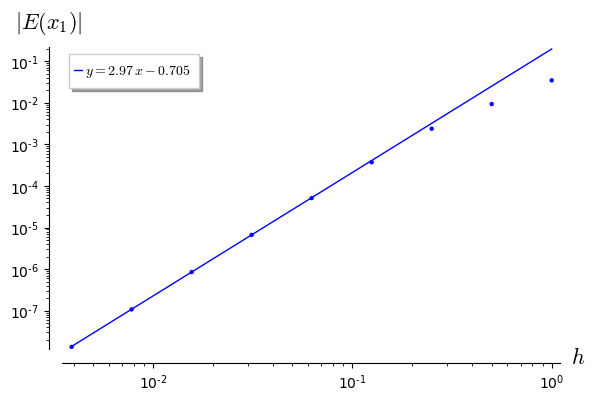

In [250]:
pic = richardson_plot([dps(pr1, s, C1, N=10*2^n) for n in range(10)],x1,10, nmin=5, nmax=7); pic

### Дифференциально-параметрическая схема 4-го порядка

In [251]:
F = a0*f(x)+ a1*L(f(x))*dt +\
    a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2) +\
    a4*f(x + a5*f(x)*dt + a6*L(f(x))*dt^2 + a7*L(L(f(x)))*dt^3) 

In [252]:
s = Scheme([x,t],[f,L],a_param, F, order = 4)
s.coefficients(right = x)

[a3*a6*a7 - 4*a3*a7^2 - a1*a7 - 1/24*a5 + 1/2*a7, a4*a5 - a3*a6 + 4*a3*a7 + a1 - 1/2, a4*a7 - 1/24, a0 + a4 - a6 + 4*a7 - 1, a2 + a6 - 4*a7]

In [253]:
C = {
    a0: 1/2,
    a1: 5/24,
    a2: 1/4,
    a3: 2/3,
    a4: 1/4,
    a5: 1/2,
    a6: 5/12,
    a7: 1/6,
}

In [254]:
sol = dps(pr1, s, C, N = 50)

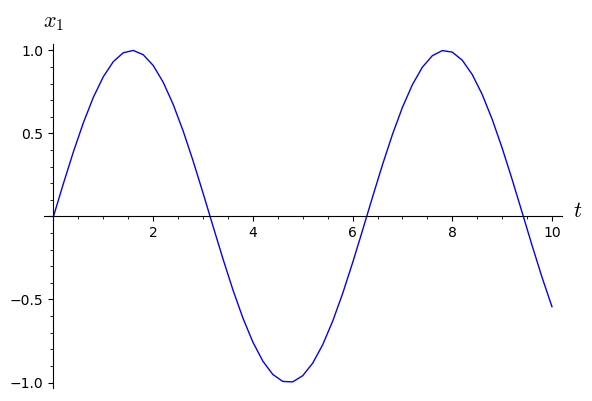

In [255]:
sol.plot(t,x1)

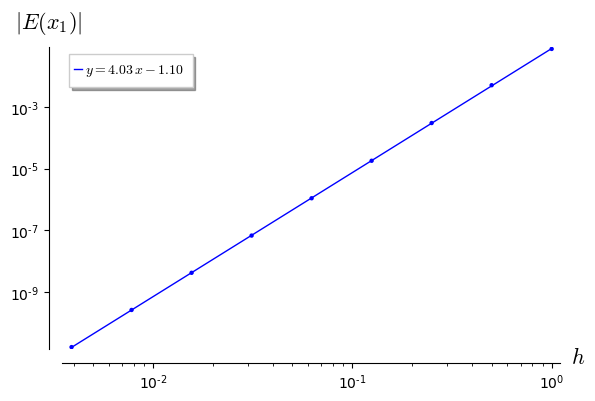

In [256]:
richardson_plot([dps(pr1, s, C, N=10*2^n) for n in range(10)],x1,10)

### Схема Шанкса

In [257]:
TS = Butcher_tableau(7,[[[0,0,0,0,0,0,0],\
                         [1/192,0,0,0,0,0,0],\
                         [-15/6,16/6,0,0,0,0,0],\
                         [4867/186, -5072/186, 298/186, 0, 0, 0,0],\
                         [-19995/31, 20896/31, -1025/31, 155/31, 0, 0, 0],\
                         [-469805/5022, 490960/5022, -22736/5022, 5580/5022, 186/5022, 0, 0],\
                         [914314/2604, -955136/2604, 47983/2604, - 6510/2604, -558/2604, 2511/2604, 0]],\
                        [14/300, 0, 81/300, 110/300, 0, 81/300, 14/300]],'7-7','Shanks')

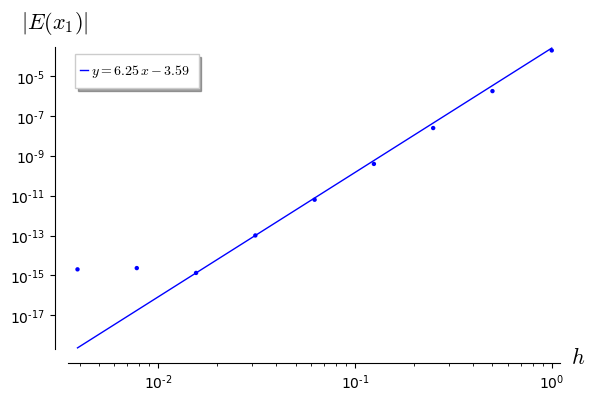

In [258]:
sh = richardson_plot([erk(pr1,N=10*2^n, tableau = TS) for n in range(10)],x1,10,nmin=5, nmax=7); sh

### Схемы большого порядка(??)

In [259]:
C = {
    a0: 1/6,
    a2: 1/6,
    a5: 1/6,
    a9: 1/6,
    a14: 1/6,
    a19: 1/6,
    a22: 1/840,
    a18: 1/120,
    a13: 1/20,
    a8: 1/16,
    a12: 1/16,
    a17: 1/16,
    a21: 1/16,
    a4: 10/16,
    a7: 2/16,
    a11: 2/16,
    a16: 1/16,
    a1: 1/2,
    a3: 1,
    a6: 1,
    a10: 1,
    a15: -2,
    a20: -1
}
F = a0*f(x)+ a1*L(f(x))*dt +\
    a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2) +\
    a5*f(x + a6*f(x)*dt + a7*L(f(x))*dt^2 + a8*L(L(f(x)))*dt^3) +\
    a9*f(x + a10*f(x)*dt + a11*L(f(x))*dt^2 + a12*L(L(f(x)))*dt^3 + a13*L(L(L(f(x))))*dt^4) +\
    a14*f(x + a15*f(x)*dt + a16*L(f(x))*dt^2 + a17*L(L(f(x)))*dt^3 + a18*L(L(L(L(f(x)))))*dt^5) +\
    a19*f(x + a20*f(x)*dt + a21*L(f(x))*dt^2 + a21*L(L(f(x)))*dt^3 + a22*L(L(L(L(L(f(x))))))*dt^6)
s = Scheme([x,t],[f,L],a_param, F.subs(C), order = 7)
s.coefficients(right = x)

[0]

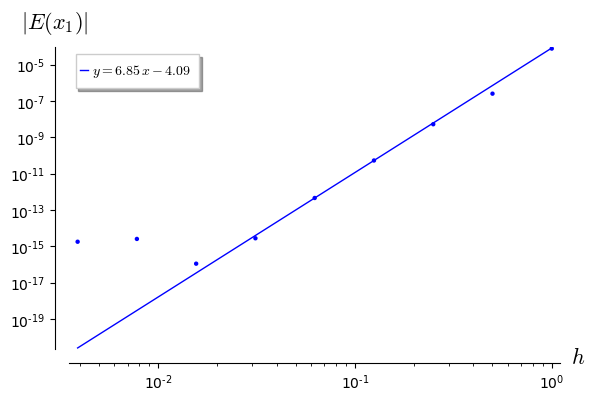

In [260]:
richardson_plot([dps(pr1, s, C, N=10*2^n) for n in range(10)], x1, 10, nmin=3, nmax=5)